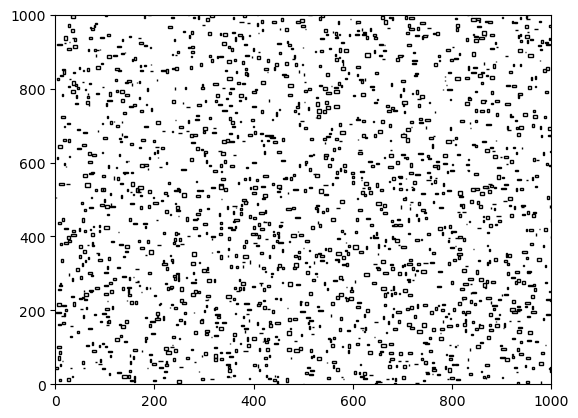

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
# create 1000 random rectangles in the space of 0-1000
x_lim = [0, 1000]
y_lim = [0, 1000]
w_lim = [1, 10]
h_lim = [1, 10]

# check each rect for intersection with the others
num = 2000
rects = []
def check_for_intersection(rect, rects):
    for i in range(rects.__len__()):
        if rect[0] < rects[i][0] + rects[i][2] and rect[0] + rect[2] > rects[i][0] and rect[1] < rects[i][1] + rects[i][3] and rect[1] + rect[3] > rects[i][1]:
            return True
    return False

for i in range(num):
    x = np.random.randint(x_lim[0], x_lim[1])
    y = np.random.randint(y_lim[0], y_lim[1])
    w = np.random.randint(w_lim[0], w_lim[1])
    h = np.random.randint(h_lim[0], h_lim[1])
    rect = np.array([x, y, w, h])
    if not check_for_intersection(rect, rects):
        rects.append(rect)

# plot them
fig, ax = plt.subplots()
for rect in rects:
    ax.add_patch(Rectangle((rect[0], rect[1]), rect[2], rect[3], fill=False))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()
    
# make last element of rects from deg to rad
rects = np.array(rects)
for i in range(rects.__len__()):
    rects[i][3] = np.deg2rad(rects[i][3])
    

    

(100, 2)


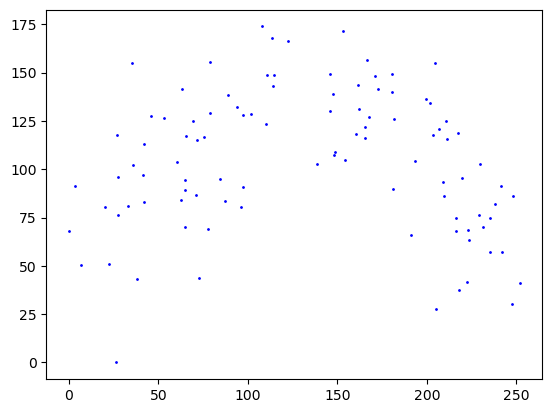

In [30]:
import sklearn
from sklearn.datasets import make_moons

# Define limits
x_lim = [0, 300]
y_lim = [0, 300]
w_lim = [1,4 ]
theta_lim = [1, 2]
num = 100
# create moons
X, y = make_moons(n_samples=2*num, noise=0.2, random_state=0)
# take only 1 of the moons
X = X[y == 0]
x_min = X[:,0].min()
y_min = X[:,1].min()
X[:,0] -= (x_min)
X[:,1] -= (y_min)
# get them to the same scale
X *= x_lim[1]/3
plt.scatter(X[:,0], X[:,1], s=1, c='b')
moon = X
print(moon.shape)

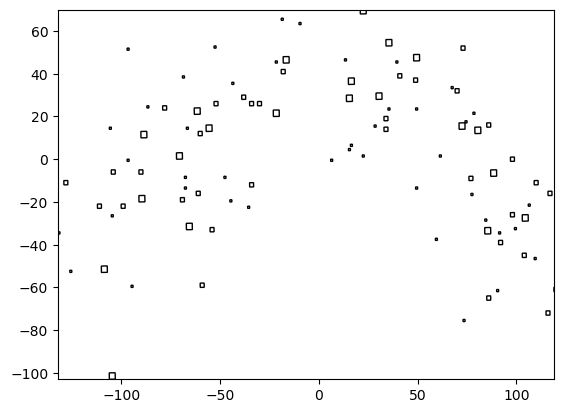

(99, 4)


In [41]:
# create 1000 squares
# check each rect for intersection with the others
squares = []
def check_for_intersection(square, squares):
    for i in range(squares.__len__()):
        if square[0] < squares[i][0] + squares[i][2] and square[0] + square[2] > squares[i][0] and square[1] < squares[i][1] + squares[i][2] and square[1] + square[2] > squares[i][1]:
            return True
    return False
random = False
if random:
    for i in range(num-1):
        x = np.random.randint(x_lim[0], x_lim[1])
        y = np.random.randint(y_lim[0], y_lim[1])
        w = np.random.randint(w_lim[0], w_lim[1])
        theta = np.random.randint(theta_lim[0], theta_lim[1])
        square = np.array([x, y, w, theta])
        if not check_for_intersection(square, squares):
            squares.append(square)
# instead of random, create a half moon of squares
if not random:
    for i in range(num-1):
        # moon is 1000x1000. at each point put a square
        x = int(moon[i][0])
        y = int(moon[i][1])
        w = np.random.randint(w_lim[0], w_lim[1])
        theta = np.random.randint(theta_lim[0], theta_lim[1])
        square = np.array([x, y, w, theta])
        if not check_for_intersection(square, squares):
            squares.append(square)

squares = np.array(squares)
# normalize mean to be 0,0
x_mean = squares[:,0].mean().astype(int)
y_mean = squares[:,1].mean().astype(int)
squares[:,0] -= x_mean
squares[:,1] -= y_mean
x_lim = [squares[:,0].min(), squares[:,0].max()]
y_lim = [squares[:,1].min(), squares[:,1].max()]
    
# plot them
fig, ax = plt.subplots()
for square in squares:
    ax.add_patch(Rectangle((square[0], square[1]), square[2], square[2], angle=square[3], fill=False))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

# 
print(squares.shape)
# make last element of squares from deg to rad
squares[:, 3] = np.deg2rad(squares[:, 3])

In [37]:
squares[:,0]

array([209,  26, 229, 216,  97,  53, 235, 201, 160,  35, 172, 122, 138,
       229,  96, 211, 222,  60, 109, 193, 110, 251,  64,  45,  72, 219,
       181, 146, 113,  27, 238,   0, 114, 161,  35,  26,  41, 235, 181,
        93, 107, 217,  88, 206, 248,  69,  20, 153, 247,  71,  37,  79,
       148,  75, 145, 113,  65, 231, 154, 191, 217,  87, 147,  42, 205,
       241,  84,   3,  22, 208, 180,  63, 101, 241, 166, 216, 165,  97,
       204, 203, 210, 167, 199,   6,  27,  77,  64,  70, 165,  32, 171,
       147,  62,  65,  41, 180, 223, 223,  79])

Loading data...
Data loaded.

Creating student for node 0 that has 100 data, which is more than the threshold 90.
Bounding box for node 0: [[-1, 307], [3, 306]]
Creating teacher for node 0 with 4 centroids.
Training Teacher Model


c:\Users\panagiotis.rigas\Documents\Code\GeoCluster\src\geometry.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation = torch.tensor(rotation, dtype=torch.float32)


Epoch: 10/100.. 
 Training loss: 80.08960.. 
 torch.mean(F): 78.55525.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.00000.. 
 Repulsive: 1.53435.. 
 Memory: 0.78555.. 
 Output: 
 [[ 60.173912  69.39161 ]
 [ 41.98104   48.34372 ]
 [ 93.780685 108.73306 ]
 [141.57625  162.9115  ]]
Epoch: 20/100.. 
 Training loss: 139.83630.. 
 torch.mean(F): 138.58731.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.00000.. 
 Repulsive: 1.24900.. 
 Memory: 1.38587.. 
 Output: 
 [[31.870981  20.618366 ]
 [13.794094   8.480416 ]
 [ 7.1602974  5.4074087]
 [81.33618   49.36579  ]]
Epoch: 30/100.. 
 Training loss: 121.06518.. 
 torch.mean(F): 119.98768.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.00000.. 
 Repulsive: 1.07750.. 
 Memory: 1.19988.. 
 Output: 
 [[77.70464  71.8864  ]
 [90.28525  80.59982 ]
 [44.223907 37.690567]
 [91.31018  81.83437 ]]
Epoch: 40/100.. 
 Training loss: 174.01913.. 
 torch.mean(F): 115.77504.. 
 Reg Proj: 57.27948.. 
 Reg Latent: 0.00000.. 
 Repulsive: 0.96461.. 
 Memory: 1.15775.. 
 Output: 
 [[ 14.

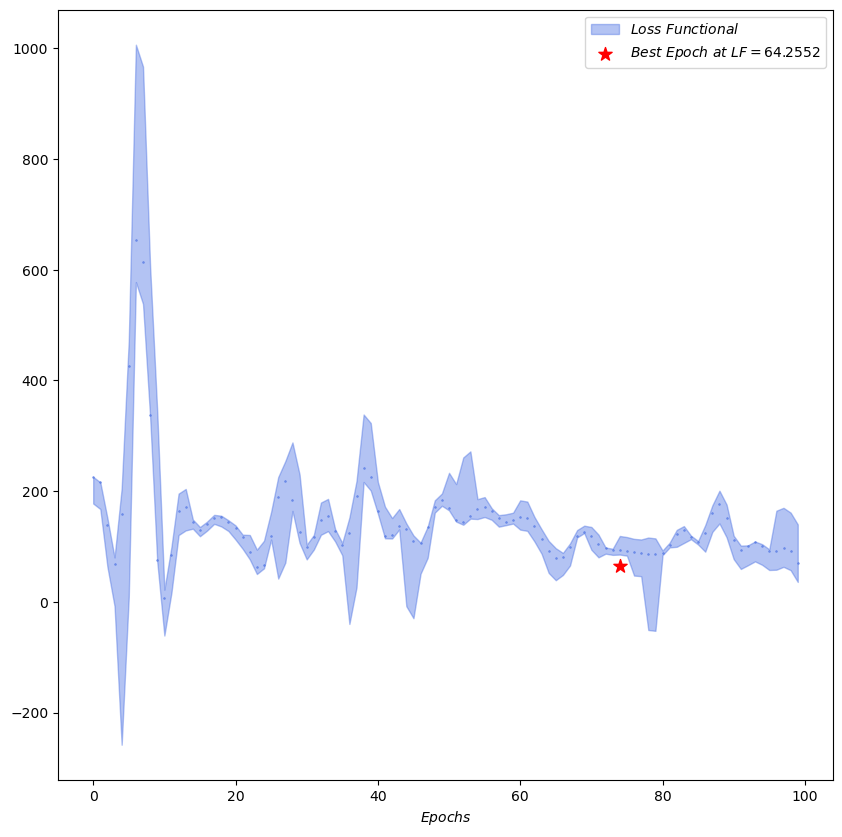

RuntimeError: expected scalar type Double but found Float

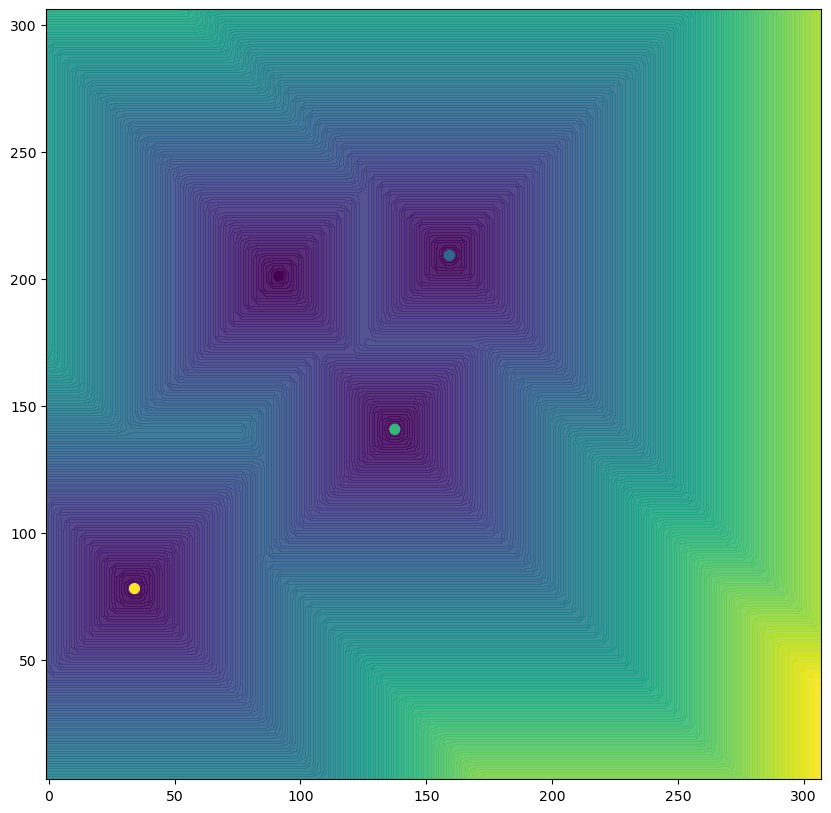

In [1]:
import torch
from src.k_tree import Ktree
from src.utils.data import loadData

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
data, _ = loadData(100)
#data = squares


#data = rects
learning_rate = 1e-2 # 1e-2, 5e-3
k = 4
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 100, # 300
    "times": 10,
    "alpha": 1, # 5 , 10
    "beta": 0, # 5
    "gamma": 0.1,
    "delta": 1,
    "f_clk": 1000,
    "scale": 1,
    "number_of_centroids": k,
    "latent_size": 30,
    "encoder_width": 30,
    "encoder_depth": 2,
    "predictor_width": k*100,
    "predictor_depth": 3,
}
n = 20
un_args = {
    "N": n,
    "M": n**2-1, # 10000 - 1
    "epsilon": 0.14 # here a layer value should be somehow included. As layers get denser  epilson should be smaller
}
student_args = {
    "optimizer_lr": 5e-3,
    "epochs": 2000, # 30000, 2000
    "width": 200,
    "depth": 5,
}

stop_criterion = 0.1*k*len(data) if len(data) > 500 else 100
thresshold = 90
ktree = Ktree(thresshold, data, teacher_args, un_args, student_args)
ktree.create_tree(save_path_prefix="models/squares/100/class", plot=True)

torch.Size([100, 2])


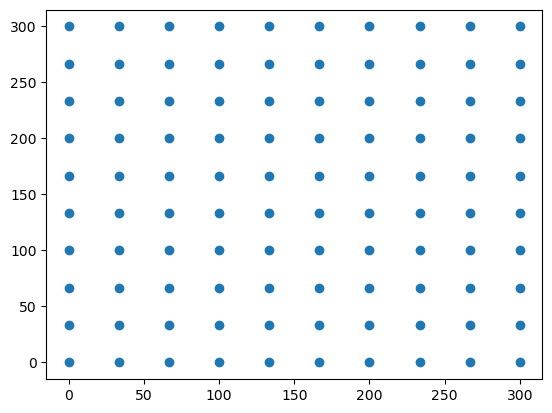

In [7]:
import numpy as np
import matplotlib.pyplot as plt

nop =  100
random_p = torch.zeros(nop, 2)
x_lim = [0,300]
y_lim = [0,300]
num = int(np.sqrt(nop))
for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
    for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
        random_p[i*num+j] = torch.Tensor([x, y])
 
infer_points = random_p.to(device)
print(infer_points.shape)
plt.scatter(infer_points[:,0], infer_points[:,1])

torch.Size([100, 2])
The percentage of correct predictions is 97.00%
The best percentage of correct predictions is 97.00%
The mean percentage of correct predictions is 97.00%


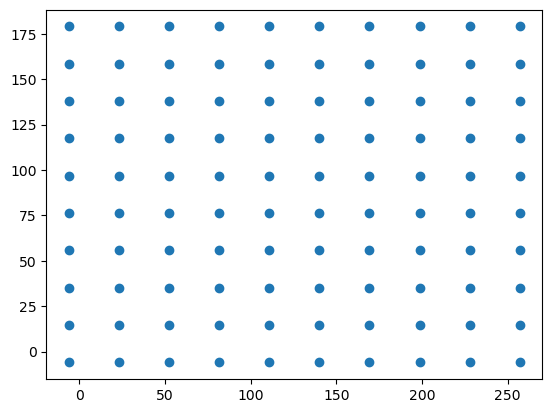

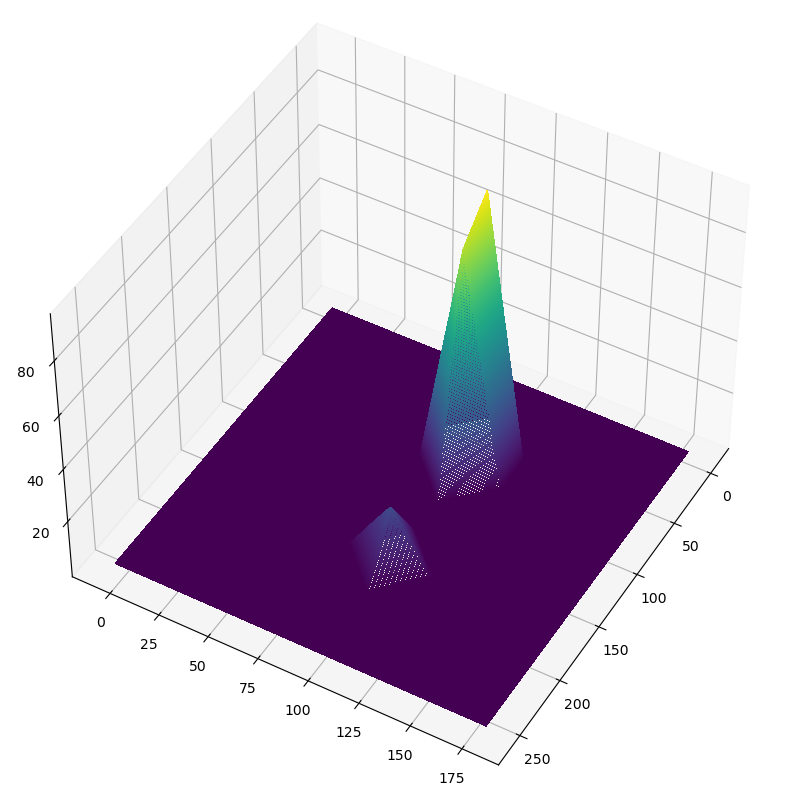

In [19]:
import numpy as np
import matplotlib.pyplot as plt
acc = 0
mean_acc = 0
times=0
print_flag = False
random = False 
out_of_dist = False 
out_of_manifold = False
ball =  2000
while times < 1:
    # now lets create randomly N points in the space 0-300, 0-300
    # [[-6, 257], [-6, 179]]
    n = 10**2
    random_p = torch.zeros(n, 2)
    x_lim = [-6,257]
    y_lim = [-6,179]
    # add ball e
    e = 0
    x_lim = [x_lim[0]-e, x_lim[1]+e]
    y_lim = [y_lim[0]-e, y_lim[1]+e]


    for i in range(n):
        random_p[i] = torch.Tensor([np.random.randint(x_lim[0],x_lim[1]), np.random.randint(y_lim[0],y_lim[1])])
        
    if random:
        infer_points = random_p.to(device)
    else:
        nop =  n
        random_p = torch.zeros(nop, 2)
        #x_lim = [0,300]
        #y_lim = [0,300]
        num = int(np.sqrt(nop))
        for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
            for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
                random_p[i*num+j] = torch.Tensor([x, y])
        
        infer_points = random_p.to(device)
        print(infer_points.shape)
        plt.scatter(infer_points[:,0], infer_points[:,1])

    if out_of_dist and out_of_manifold:
        # plot points outside 0,300
        x_lim = [0,300]
        y_lim = [0,300]
        x_lim = [x_lim[0]-ball, x_lim[1]+ball]
        y_lim = [y_lim[0]-ball, y_lim[1]+ball]
        num = int(np.sqrt(nop))
        for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
            for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
                random_p[i*num+j] = torch.Tensor([x, y])
        infer_points = random_p.to(device)
        print(infer_points.shape)
        plt.scatter(infer_points[:,0], infer_points[:,1])

            
        
    num_of_correct_predictions = 0
    

    qp = infer_points
    z_wrong = np.zeros(len(qp))
    z_label_wrong = np.zeros(len(qp))
    qp = infer_points
    for i in range(len(qp)):
        query_point = qp[i]
        pred = ktree.query(query_point)
        brute_force = ktree.root.query(query_point)
        # print(pred)
        # print(brute_force)
        if(np.array_equal(pred, brute_force)):
            num_of_correct_predictions += 1
        else:
            z_wrong[i] = max(abs(pred[:2]-brute_force[:2]))
            if z_wrong[i] > 0.1:
                z_label_wrong[i] = 1

            if print_flag:
                print("="*20)
                print(f"Wrong prediction for {query_point}")
                print(f"Predicted {pred}")
                print(f"Brute force {brute_force}")
                # reshape z_wong to be a 2d array
    axis = int(np.sqrt(len(qp)))
    # make contour of the z_wrong
    x = np.linspace(x_lim[0],x_lim[1], axis)                                        
    y = np.linspace(y_lim[0],y_lim[1], axis)
    X, Y = np.meshgrid(x, y)
    Z = z_wrong.reshape(X.shape)
    if out_of_dist and out_of_manifold:
        # make 0 in Z all values between 0,300, 0,300
        # first find index in X 
        x_index = np.where((X>=x_lim[0]+ball) & (X<= x_lim[1]-ball))
        #y_index = np.where((Y>=y_lim[0]+ball) & (Y<= y_lim[1]-ball))
        # now make Z 0 in these indexes
        Z[x_index] = 0
        #Z[y_index] = 0
        
    # make 3d plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.contourf(X, Y, Z, 200, cmap='viridis')
    # rotate
    ax.view_init(45, 30)
    acc = num_of_correct_predictions / len(infer_points) * 100
    mean_acc += acc
    times += 1

    print(f"The percentage of correct predictions is {acc:.2f}%")

print(f"The best percentage of correct predictions is {acc:.2f}%")
print(f"The mean percentage of correct predictions is {mean_acc/times:.2f}%")

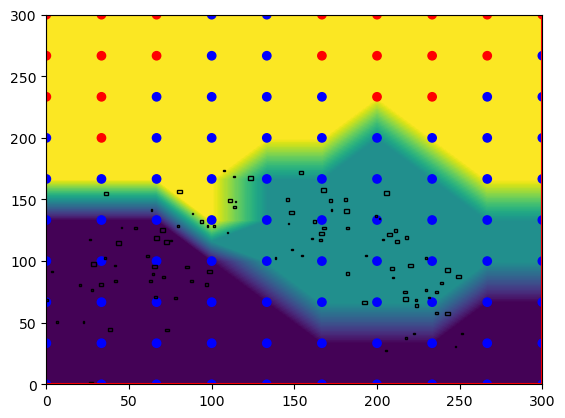

In [17]:
# do a 2d contour
fig, ax = plt.subplots()
x = np.linspace(x_lim[0],x_lim[1], axis)
y = np.linspace(y_lim[0],y_lim[1], axis)
label = ktree.root.student(qp).max(1)[-1].detach().cpu().numpy()
Z_ = label.reshape(X.shape)
#plt.contourf(X, Y, Z_, 100, cmap='viridis')
ax.contourf(X, Y, Z_, 100, cmap='viridis')
# make color bar of Z_
# plot a scatter of wrong predictions
# make new label
ax.scatter(qp[:,0], qp[:,1], c=z_label_wrong, cmap='bwr')
#plt.colorbar()
# do a plot of the area [0,300]
# plot a square centered at 0,0 with length 300
ax.plot([0,0], [0,300], color='r')
ax.plot([0,300], [0,0], color='r')
ax.plot([0,300], [300,300], color='r')
ax.plot([300,300], [0,300], color='r')
# plot them
for square in squares:
    ax.add_patch(Rectangle((square[0], square[1]), square[2], square[2], angle=np.deg2rad(square[3]), fill=False))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()


#plt.show()

In [163]:
x1 = np.array([77, 69])
x2 = np.array([251, 41])
q = np.array([1178.9474, -757.8947])
d1 = max(abs(x1-q))
d2 = max(abs(x2-q))
d3 = max(abs(x1-x2))
print(d1)
print(d2)
print(d3)
print(d2== d1-d3)

1101.9474
927.9474
174
True


In [135]:
X[1].shap

(20,)

In [52]:
num_of_correct_predictions = 0
qp = infer_points
z =  np.zeros(len(qp))
for i in range(len(qp)):
    query_point = qp[i]
    pred = ktree.query(query_point)
    brute_force = ktree.root.query(query_point)
    # print(pred)
    # print(brute_force)
    if(np.array_equal(pred, brute_force)):
        num_of_correct_predictions += 1
    else:
        # do l-inf norm
        z[i] = max(abs(pred[:2]-brute_force[:2]))
print(z)
 
print(f"The percentage of correct predictions is {(num_of_correct_predictions / len(infer_points)) * 100:.2f}%")


[37. 60. 63. 37. 63. 65. 65. 60. 37. 73. 37. 63. 63. 63. 37. 74. 63. 63.
 74. 60. 63. 37. 63. 74. 37. 37. 63. 63. 63. 37. 37. 73. 37. 37. 37. 37.
 63. 65. 63. 73. 60. 37. 60. 69. 37. 37. 37. 60. 37. 63. 60. 37. 73. 37.
 63. 65. 73. 73. 37. 37. 63. 63. 37. 63. 69. 69. 65. 37. 60. 63. 73. 63.
 37. 37. 63. 60. 69. 37. 63. 74. 63. 63. 37. 73. 37. 37. 73. 37. 74. 37.
 63. 73. 63. 63. 37. 69. 73. 69. 73. 63.]
The percentage of correct predictions is 0.00%


In [53]:
print(pred)
print(brute_force)

[ 35 154   1   0]
[ 3 91  1  0]


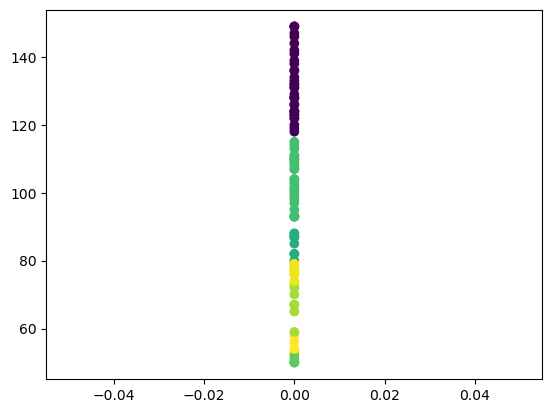

In [54]:
plt.scatter(infer_points[:,0], infer_points[:,1], c=z)

torch.Size([1936, 2])


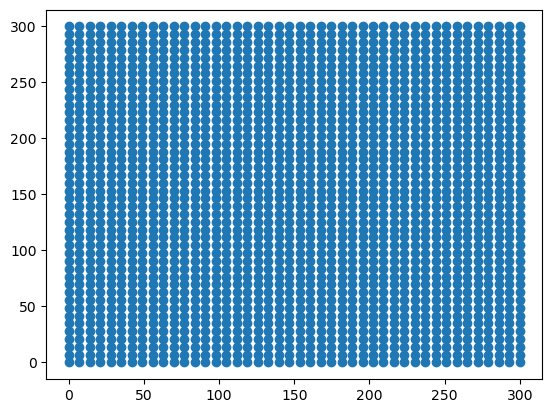

In [30]:
import numpy as np
import matplotlib.pyplot as plt

nop =  2000
random_p = torch.zeros(nop, 2)
x_lim = [0,300]
y_lim = [0,300]
# add e
e = 0
x_lim = [x_lim[0]-e, x_lim[1]+e]
y_lim = [y_lim[0]-e, y_lim[1]+e]
num = int(np.sqrt(nop))
random_p = torch.zeros(num*num, 2)
for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
    for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
        random_p[i*num+j] = torch.Tensor([x, y])
 
infer_points = random_p.to(device)
plt.scatter(infer_points[:,0], infer_points[:,1])
print(infer_points.shape)

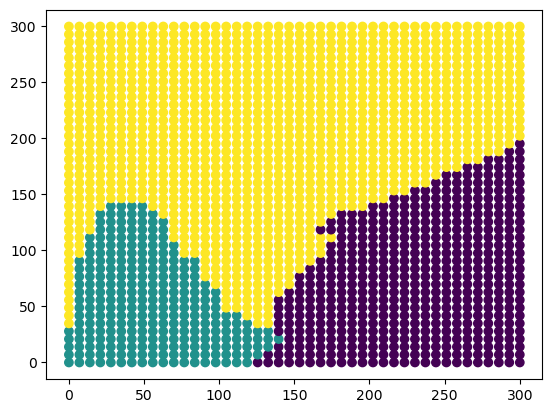

In [31]:
def R(z, node, infer_points):
    for i in range(len(node.children)):
        if not node.children[i].isLeaf():
            index = z == node.children[i].student(infer_points).max(1)[1]
            qp = infer_points[index]
            z_new = node.children[i].student(qp).max(1)[1]
            max_z = z.max()
            z[index] = max_z + 1 + z_new
            for j in range(len(node.children[i].children)):
                R(z, node.children[i].children[j], qp)
        else:
            if node.parent is not None:
                R(z, node.parent, infer_points)

# Initial prediction
z = ktree.root.student(infer_points).max(1)[1]

# Update z recursively
R(z, ktree.root, infer_points)

# Plot infer_points with colors based on z
plt.scatter(infer_points[:,0], infer_points[:,1], c=z)
plt.show()

In [24]:
infer_points
z = ktree.root.student(infer_points).max(1)[1]
def R(z, node, infer_points):
    for i in range(len(node.children)):
        if not node.children[i].isLeaf():
            if z in node.children[i].student(infer_points).max(1)[1]:
                index = z == node.children[i].student(infer_points).max(1)[1]
                qp = infer_points[index]
                z_new = node.children[i].student(qp).max(1)[1]
                max_z = z.max()
                z[index] = max_z+ 1 + z_new
                length = len(node.children[i].children)
                for j in range(length):
                    R(z, node.children[i].children[j], infer_points)
        else:
            node = node.parent
            R(z, node, infer_points)
                
R(z, ktree.root, infer_points)
# plot infer points, color coded by the prediction
print(z.max())
plt.scatter(infer_points[:,0], infer_points[:,1], c=z)

AttributeError: 'NoneType' object has no attribute 'children'

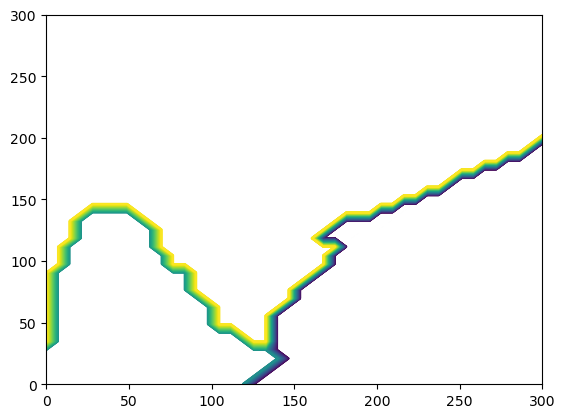

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def traverse_and_update(node, infer_points, z, k=3):
    if node.isLeaf():
        return z

    for i in range(k):
        node_flag = node.children[i].isLeaf()
        qp = infer_points[z==i]
        if not node_flag:
            pred = node.children[i].student(qp)
            _, z_ = torch.max(pred, 1)
            max_z = torch.max(z)
            index = z==i
            z[index] = (i+1)*max_z + z_ + 1
            for j in range(k):
                node_flag = node.children[i].children[j].isLeaf()
                qp = infer_points
                if not node_flag:
                    qp = infer_points[index]
                    pred = node.children[i].children[j].student(qp)
                    _, z__ = torch.max(pred, 1)
                    z[index] = (j+1)*max_z + z__ + 1
                    z = traverse_and_update(node.children[i].children[j], qp, z, k)
    return z

def plot_contour(infer_points, z, e=0, num=100):
    x = np.linspace(0-e, 300+e, num)
    y = np.linspace(0-e, 300+e, num)
    X, Y = np.meshgrid(x, y)
    z_new = z
    Z = z_new.reshape(X.shape)
    plt.contour(Y,X, Z, cmap='viridis',levels=200, alpha=0.8)
    plt.show()

# Initial prediction
node = ktree.root
n = infer_points.shape[0]
z = torch.zeros(1, n)
pred = node.student(infer_points)
_, z = torch.max(pred, 1)

# Update z recursively
z = traverse_and_update(node, infer_points, z)

# Plot infer_points with colors based on z
plot_contour(infer_points, z, e=0, num=int(np.sqrt(n)))



In [22]:
node = ktree.root
# z are the labels shape (1,N)
n = infer_points.shape[0]
z = torch.zeros(1, n)
print(node.isLeaf())
pred = node.student(infer_points)
_, z = torch.max(pred, 1)
print(z.shape)
# ======================
k=3
for i in range(k):
    node_flag = node.children[i].isLeaf()
    qp = infer_points[z==i]
    if not node_flag:
        pred = node.children[i].student(qp)
        _, z_ = torch.max(pred, 1)
        max_z = torch.max(z)
        #print(max_z)
        index = z==i
        z[index] = (i+1)*max_z + z_ + 1
        #print(torch.max(z))
        for j in range(k):
            node_flag = node.children[i].children[j].isLeaf()
            qp = infer_points
            if not node_flag:
                print("not leaf")
                qp = infer_points[index]
                pred = node.children[i].children[j].student(qp)
                _, z__ = torch.max(pred, 1)
                max_z_ = torch.max(z)
                print(z__.shape)
               
                index_ = z[index] == (i+1)*max_z + j + 1
                #index_ = z[z[index]==(i+1)*max_z + z_ + 1] == j
                z[index] = (j+1)*max_z + z__ + 1
# do a contour plot of the predictions 
x = np.linspace(0-e, 300+e, num)
y = np.linspace(0-e, 300+e, num)
X, Y = np.meshgrid(x, y)
z_new = z
Z = z_new.reshape(X.shape)
plt.contour(Y,X, Z, cmap='viridis',levels=200, alpha=0.8)
# also plot the centroids
#plt.scatter(qp[:,0], qp[:,1], c=z_, s=10)

False
torch.Size([1000])


RuntimeError: shape '[31, 31]' is invalid for input of size 1000

##  Tree search

In [ ]:
x = torch.tensor([1.,2.,3.,6.])
y = torch.tensor(2., dtype=torch.long)
ce = torch.nn.CrossEntropyLoss()
ce(x, y)

In [ ]:
class Critic(nn.Module):
    """
        Critic Network

        Parameters:
            input_dim (int): Number of input dimensions
            hidden_dim (int): Number of hidden dimensions
            output_dim (int): Number of output dimensions
            
        Returns:
            output: Critic network output
        
        Methods:
            forward(state): Returns critic network output for given state
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.fc2(x)
        return x

class Actor(nn.Module):
    """
        Actor Network
        
        Parameters:
            input_dim (int): Number of input dimensions
            hidden_dim (int): Number of hidden dimensions
            output_dim (int): Number of output dimensions
            
        Returns:
            output: Actor network output
            
        Methods:
            forward(state): Returns actor network output for given state
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.softmax(self.fc2(x))
        return x

class ActorCritic(nn.Module):
    """
        Actor Critic Network
        
        Parameters:
            input_dim (int): Number of input dimensions
            hidden_dim (int): Number of hidden dimensions
            output_dim (int): Number of output dimensions
            
        Returns:
            policy: Actor network output
            value: Critic network output
            
        Methods:
            forward(state): Returns actor and critic network output for given state
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ActorCritic, self).__init__()
        self.actor = Actor(input_dim, hidden_dim, output_dim)
        self.critic = Critic(input_dim, hidden_dim, 1)

    def forward(self, state):
        policy = self.actor(state)
        value = self.critic(state)
        return policy, value

In [ ]:
class A2C:
    """
        A2C Agent
        
        Parameters:
            actor_critic (ActorCritic): ActorCritic network
            optimizer (torch.optim): PyTorch optimizer
            gamma (float): Discount factor
            
        Methods:
            update(state, action, reward, next_state, done): Performs a single agent update
    """
    def __init__(self, actor_critic, optimizer, gamma=0.99):
        self.actor_critic = actor_critic # ActorCritic
        self.optimizer = optimizer # torch.optim
        self.gamma = gamma # float: discount factor

    def update(self, state, action, reward, next_state, done):
        # Get current policy and value
        policy, value = self.actor_critic(state)

        # Compute target value
        _, next_value = self.actor_critic(next_state)
        target_value = reward + self.gamma * next_value * (1 - done)

        # Compute advantage
        advantage = target_value - value

        # Compute actor loss (policy gradient loss)
        action_prob = policy.gather(1, action.unsqueeze(-1)).squeeze(-1)
        actor_loss = -torch.log(action_prob + 1e-5) * advantage.detach()

        # Compute critic loss (value loss)
        critic_loss = F.mse_loss(value, target_value.detach())

        # Combine losses
        loss = actor_loss + critic_loss

        # Perform backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return actor_loss.item(), critic_loss.item()

In [ ]:
# Define environment
env = ...  # your environment

# Define actor-critic network
input_dim = ...  # your input dimension
hidden_dim = ...  # your hidden dimension
output_dim = ...  # your output dimension
actor_critic = ActorCritic(input_dim, hidden_dim, output_dim)

# Define optimizer
optimizer = torch.optim.Adam(actor_critic.parameters())

# Define A2C module
a2c = A2C(actor_critic, optimizer)

# Define episodes
num_episodes = 1000 # number of episodes
max_steps = 100 # steps per episode

# Training loop
for episode in range(num_episodes):
    state = env.reset() # reset environment: returns initial state
    for t in range(max_steps):
        # Select action
        policy, _ = actor_critic(state)
        action = torch.multinomial(policy, 1) # sample action from policy

        # Take step in environment
        next_state, reward, done, _ = env.step(action.item())

        # Update actor-critic
        actor_loss, critic_loss = a2c.update(state, action, reward, next_state, done)

        # Update state
        state = next_state

        # Break if done
        if done:
            break

In [ ]:
# Define environment
env = ...  # your environment

# Load actor-critic network
actor_critic = ...  # load your trained actor-critic network

# Define episodes
num_episodes = 10  # number of episodes to run

# Inference loop
for episode in range(num_episodes):
    state = env.reset()  # reset environment: returns initial state
    done = False
    while not done:
        # Select action
        with torch.no_grad():
            policy, _ = actor_critic(state)
            action = torch.multinomial(policy, 1)  # sample action from policy

        # Take step in environment
        next_state, reward, done, _ = env.step(action.item())

        # Update state
        state = next_state

        # Render environment
        env.render()

        # Break if done
        if done:
            break